In [175]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
#カーネル関数
#def kernel(x,y):
#    return np.exp(-(np.linalg.norm(x-y))**2/1.0**2)

def kernel(x,y):
    return (np.dot(x,y) + 2.0)**2

In [184]:
n_sample = 100
X = []
for i in range(n_sample):
    X.append(np.random.normal(0,0.5,2))
for i in range(n_sample):
    tmp = np.random.uniform(-1,1)
    X.append(np.array([5*tmp,np.sqrt(25-(5*tmp)**2)])+np.random.normal(0,0.5,2))

X = np.array(X)
#np.random.shuffle(X)

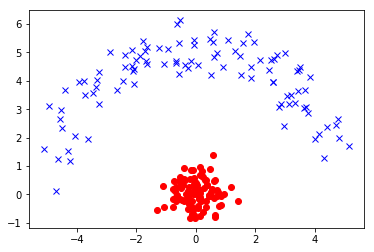

In [185]:
plt.plot(X[:,0][:100],X[:,1][:100],"o",color="red")
plt.plot(X[:,0][100:],X[:,1][100:],"x",color="blue")


plt.show()

In [186]:
# kernel matrix
N=200
K = np.zeros((N,N))
for i in range(N):
    for j in range(i,N):
        K[i,j] = K[j,i] = kernel(X[i], X[j])

K_ = np.zeros((N,N))
for i in range(N):
    for j in range(i,N):
        K_[i,j] = K_[j,i] = K[i,j]+np.mean(K)-(np.mean(K[i:,])+np.mean(K[:,j]))


# centered kernel matrix
#ones = np.mat(np.ones((N,N))) / N
#K = K - ones * K - K * ones + ones * K * ones

In [187]:
#固有値分解
w,v = np.linalg.eig(K_) #w固有値、固有ベクトル

In [188]:
ind = w.argsort()[::-1]
x1 = ind[0]
x2 = ind[1]
eta1 = w[x1]**0.5
eta2 = w[x2]**0.5

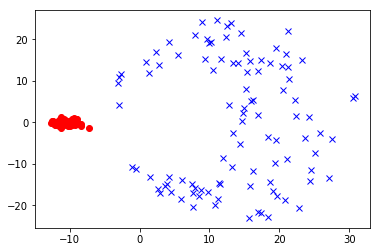

In [189]:
for i in range(200):
    if i<100:
        plt.plot(eta1*v[i,x1],eta2*v[i,x2],"o",color="red")
    else:
        plt.plot(eta1*v[i,x1],eta2*v[i,x2],"x",color="blue")
plt.show()